In [1]:
from flame_utils import ModelFlame, hplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [9, 6]

## create `ModelFlame` object from lattice file

In [2]:
fm = ModelFlame('PS_demo.lat')

## run FLAME simulation

In [3]:
r, s = fm.run(monitor='all')

## define functions to create "phase ellipse"

In [4]:
# Function to convert Twiss parameters to Sigma-matrix (covariance)
def tws2cov(alpha, beta, eps):
    mat = np.zeros([2,2])
    mat[0,0] = beta*eps
    mat[0,1] = mat[1,0] = -alpha*eps
    mat[1,1] = (1.0 + alpha*alpha)/beta*eps
    return mat

# Function to generate phase ellipse from centroid and covariance
def ellipse(cen, cov, facecolor='none', **kws):
    # calculate eigenequation to transform the ellipse
    v, w = np.linalg.eigh(cov)
    u = w[0]/np.linalg.norm(w[0])
    ang = np.arctan2(u[1], u[0])*180.0/np.pi
    v = 2.0*np.sqrt(v)
    ell = mpl.patches.Ellipse(cen, v[0], v[1], 180+ang, facecolor=facecolor, **kws)
    return ell

def phase_ellipse(coor, bmstate, **kws):
    if not coor in ['x', 'y', 'z']:
        return None
    cen   = np.array([d[coor+'cen'][idx], d[coor+'pcen'][idx]])
    twsa = d[coor+'twsa'][idx]
    twsb = d[coor+'twsb'][idx]
    eps  = d[coor+'eps'][idx]
    cov = tws2cov(twsa, twsb, eps)
    return ellipse(cen, cov, **kws), np.array([cen[0], cen[1], twsa, twsb, eps])

keys = ['Centroid position', 'Centroid momentum', 'Twiss alpha', 'Twiss beta', 'Geom. emittance']

## collect results for plot

In [5]:
r, s = fm.run(monitor='all')
d = fm.collect_data(r, 'xcen', 'ycen', 'xpcen', 'ypcen', 'xtwsa', 'ytwsa', 'xtwsb', 'ytwsb', 'xeps', 'yeps')

## pickup one element to check the phase ellipse (`qd2` section would be selected by user)

In [6]:
idx = fm.find('qd2')[0]

## plot X phase ellipse after `qd2`

Centroid position :    0.000
Centroid momentum :    0.000
Twiss alpha       :   -8.328
Twiss beta        :   46.372
Geom. emittance   :    1.659


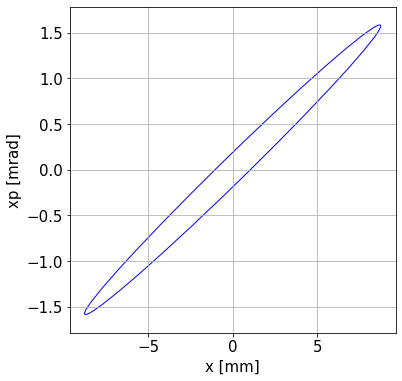

In [7]:
fig, ax = plt.subplots()
el, res = phase_ellipse('x', r[idx][1], edgecolor='b')
ax.add_patch(el)
ax.autoscale_view()
ax.set_xlabel('x [mm]')
ax.set_ylabel('xp [mrad]')
ax.set_box_aspect(1)
ax.grid()

for k, v in zip(keys, res):
    print('{:18}: {:>8.3f}'.format(k, v))

## plot Y phase ellipse after `qd2`

Centroid position :    0.000
Centroid momentum :    0.000
Twiss alpha       :    6.770
Twiss beta        :  210.345
Geom. emittance   :    1.450


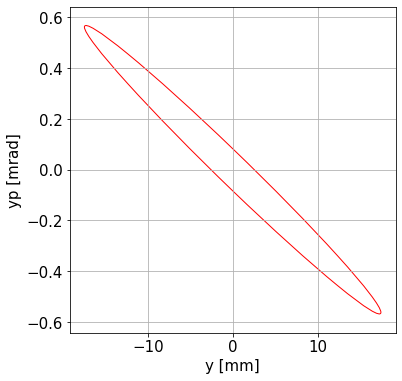

In [8]:
fig, ax = plt.subplots()
el, res = phase_ellipse('y', r[idx][1], edgecolor='r')
ax.add_patch(el)
ax.autoscale_view()
ax.set_xlabel('y [mm]')
ax.set_ylabel('yp [mrad]')
ax.set_box_aspect(1)
ax.grid()

for k, v in zip(keys, res):
    print('{:18}: {:>8.3f}'.format(k, v))